In [1]:
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import sketch
from shapely.geometry import Point
import time
import re
import folium
from folium.plugins import MarkerCluster, HeatMap
from IPython.display import display
from folium.plugins import TimestampedGeoJson#muestra datos geoespacioales a lo largo del tiempo



# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

# IPS ORIGEN

In [2]:


def obtener_info_lugar(longitud, latitud):
    geolocalizador = Nominatim(user_agent="tu_aplicacion")

    try:
        ubicacion = geolocalizador.reverse((latitud, longitud), language='es', exactly_one=True)
        print(f"Coordenadas: ({longitud}, {latitud}), Resultado: {ubicacion}")
        if ubicacion is not None:
            return ubicacion.address
        else:
            return "Coordenadas en el mar u océano"
    except Exception as e:
        print(f"Error al obtener información de ubicación para ({longitud}, {latitud}): {e}")
        return None

# Nombre del archivo de entrada y salida
archivo_entrada = r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\Long_lat_ips_origen_tuplas.txt"
archivo_salida = r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\resultados_geolocalizacion_origen_lugares.txt"

# Leer el contenido del archivo de entrada
with open(archivo_entrada, 'r') as file:
    contenido = file.readlines()

# Crear un DataFrame con las coordenadas
data = {'Longitud': [], 'Latitud': []}
for linea in contenido:
    # Eliminar paréntesis y dividir la línea en coordenadas
    coordenadas = linea.strip('()\n').split(', ')
    
    if len(coordenadas) == 2:
        longitud, latitud = map(float, coordenadas)
        data['Longitud'].append(longitud)
        data['Latitud'].append(latitud)

df = pd.DataFrame(data)

# Obtener la información de lugar para cada par de coordenadas
df['Info_Lugar'] = df.apply(lambda row: obtener_info_lugar(row['Longitud'], row['Latitud']), axis=1)

# Mostrar el DataFrame con la información de lugar
print(df[['Longitud', 'Latitud', 'Info_Lugar']])

# Guardar la información en un archivo de texto
df.to_csv(archivo_salida, index=False, sep='\t')

print(f"Resultados guardados en '{archivo_salida}'.")


    


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Cursos\\BC_Data_Science\\Repositorio\\ONLINE_DS_THEBRIDGE_V\\proyecto EDA\\Long_lat_ips_origen_tuplas.txt'

In [4]:
#creamos una lista de tuplas

# Nombre del archivo de entrada y salida
archivo_entrada = r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\ips_origen_2vez_2_filtrado.txt"
archivo_salida = r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\Long_lat_ips_origen_tuplas.txt"

# Leer el contenido del archivo de entrada
with open(archivo_entrada, 'r') as file:
    contenido = file.readlines()

# Modificar y escribir las líneas en el archivo de salida
with open(archivo_salida, 'w') as file:
    for linea in contenido:
        # Dividir la línea en palabras
        palabras = linea.split()
        
        # Obtener las coordenadas (longitud, latitud)
        longitud_index = palabras.index('Longitud:') + 1
        latitud_index = palabras.index('Latitud:') + 1
        coordenadas = (float(palabras[longitud_index].replace(',', '')), float(palabras[latitud_index]))
        
        # Escribir las coordenadas en el archivo de salida
        file.write(str(coordenadas) + '\n')

print(f"Tuplas de coordenadas extraídas y guardadas en '{archivo_salida}'.")

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Cursos\\BC_Data_Science\\Repositorio\\ONLINE_DS_THEBRIDGE_V\\proyecto EDA\\ips_origen_2vez_2_filtrado.txt'

In [71]:
#paso el textyo a csv

In [5]:
# Nombre del archivo de entrada
archivo_resultados = r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\TEXT\resultados_geolocalizacion_origen_lugares.txt"

# Leer el contenido del archivo de resultados
with open(archivo_resultados, 'r', encoding='utf-8') as file:
    contenido_resultados = file.readlines()

# Crear una lista para almacenar los datos
data = []

# Omitir la primera línea que contiene encabezados
for linea in contenido_resultados[1:]:
    # Dividir la línea en Longitud, Latitud e Info_Lugar
    partes = linea.strip().split('\t')
    
    if len(partes) == 3:
        longitud, latitud, info_lugar = partes
        data.append({
            'Longitud': float(longitud),
            'Latitud': float(latitud),
            'Info_Lugar': info_lugar
        })

# Crear un DataFrame a partir de la lista de datos
df_lugares_origen = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_lugares_origen)



# Guardar el DataFrame en un nuevo archivo CSV
df_lugares_origen.to_csv('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen.csv', index=False)


      Longitud    Latitud                                         Info_Lugar
0    29.555740  52.658705  83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...
1    21.874273 -82.797050                     Coordenadas en el mar u océano
2    35.554545  45.445429              República Autónoma de Crimea, Ucrania
3    26.230098  50.573701  Великоомелянська сільська громада, Рівненський...
4    26.190156  50.545351  Ільпінь, Здолбунівська міська громада, Рівненс...
..         ...        ...                                                ...
874 -47.739233 -65.901628                     Coordenadas en el mar u océano
875  35.575340  45.456724              República Autónoma de Crimea, Ucrania
876  33.303067  44.370377         Sebastopol, Южный федеральный округ, Rusia
877  35.567435  45.400936              República Autónoma de Crimea, Ucrania
878  48.779024   2.007804                     Coordenadas en el mar u océano

[879 rows x 3 columns]


In [6]:
df_lugares_origen=pd.read_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen.csv")

In [7]:
df_lugares_origen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitud    879 non-null    float64
 1   Latitud     879 non-null    float64
 2   Info_Lugar  879 non-null    object 
dtypes: float64(2), object(1)
memory usage: 20.7+ KB


In [8]:
import spacy
import pandas as pd

# Cargar el modelo de lenguaje en español de spaCy
nlp = spacy.load("es_core_news_sm")

# tengo un DataFrame llamado df_lugares_origen con una columna "Info_lugar" con texto
# Reemplaza df_lugares_origen y 'texto' con tus propios datos, que filte el texto y saque ciudad o pais


# Función para clasificar las entidades en una fila
def clasificar_entidades(fila):
    doc = nlp(fila['Info_Lugar'])
    ciudades = []
    paises = []
    
    for entidad in doc.ents:
        if entidad.label_ == 'LOC':
            ciudades.append(entidad.text)
        elif entidad.label_ == 'GPE':
            paises.append(entidad.text)

    return pd.Series({'Ciudad': ', '.join(ciudades), 'Pais': ', '.join(paises)})

# Aplicar la función a cada fila del DataFrame
df_lugares_origen[['Ciudad', 'Pais']] = df_lugares_origen.apply(clasificar_entidades, axis=1)

# Mostrar el DataFrame resultante
df_lugares_origen


,Longitud,Latitud,Info_Lugar,Ciudad,Pais
0,29.555740,52.658705,"83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...","Мольча, Чыркавіцкі сельскі Савет, Provincia de...",
1,21.874273,-82.797050,Coordenadas en el mar u océano,,
2,35.554545,45.445429,"República Autónoma de Crimea, Ucrania",Ucrania,
3,26.230098,50.573701,"Великоомелянська сільська громада, Рівненський...","Великоомелянська, Ucrania",
4,26.190156,50.545351,"Ільпінь, Здолбунівська міська громада, Рівненс...",Ucrania,
...,...,...,...,...,...
874,-47.739233,-65.901628,Coordenadas en el mar u océano,,
875,35.575340,45.456724,"República Autónoma de Crimea, Ucrania",Ucrania,
876,33.303067,44.370377,"Sebastopol, Южный федеральный округ, Rusia","Sebastopol, Южный, Rusia",
877,35.567435,45.400936,"República Autónoma de Crimea, Ucrania",Ucrania,


In [9]:
df_lugares_origen.drop(columns="Pais", inplace=True)



In [10]:
# Lista para almacenar índices de filas que cumplen con la condición
indices_a_eliminar = []

# Iterar sobre las filas del DataFrame
for index, row in df_lugares_origen.iterrows():
    # Verificar la condición en la columna 'Info_Lugares'
    if row['Info_Lugar'] == 'Coordenadas en el mar u océano':
        # Agregar el índice a la lista
        indices_a_eliminar.append(index)

# Eliminar las filas con los índices recopilados
df_lugares_origen.drop(indices_a_eliminar, inplace=True)

In [11]:
df_lugares_origen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 877
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitud    497 non-null    float64
 1   Latitud     497 non-null    float64
 2   Info_Lugar  497 non-null    object 
 3   Ciudad      497 non-null    object 
dtypes: float64(2), object(2)
memory usage: 19.4+ KB


In [12]:
df_lugares_origen.Info_Lugar.unique()

array(['83, Цэнтральная вуліца, Мольча, Чыркавіцкі сельскі Савет, Светлагорскі раён, Provincia de Gómel, Belarús',
       'República Autónoma de Crimea, Ucrania',
       'Великоомелянська сільська громада, Рівненський район, Óblast de Rivne, Ucrania',
       'Ільпінь, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania',
       'Dhofar, Omán',
       'М-06;Н-25, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35702, Ucrania',
       'Здолбунівська міська громада, Рівненський район, Óblast de Rivne, Ucrania',
       'Güneyce, Arsin, Trabzon, Región del Mar Negro, Turquía',
       'Обарів, Городоцька сільська громада, Рівненський район, Óblast de Rivne, 35307, Ucrania',
       'вулиця Шевченка, Орестів, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania',
       'Afder, Somali, Etiopía',
       '"ОЗ ""Шпанівський ліцей"", Робітнича вулиця, Шпанів, Шпанівська сільська громада, Рівненський район, Óblast de Rivne, 

In [74]:
df_lugares_origen.to_excel('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen_final.xlsx', index=False)

# HALLAMOS FRECUENCIAS DE DISTRIBUCION Y COMPARAMOS CON TIPOS DE ATAQUES E INTERVLO DE LOS MISMOS

In [13]:
df_lugares_origen=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen_final.xlsx")

In [14]:
#cargo el df eda para comparar con tipos de ataques
df_eda= pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado_ciudades_final.xlsx")

In [73]:
df_eda.head(2)

,Anyo,Fecha,Hora,IP Origen,Destino IP,Ciudades,Estados,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Etiqueta_x,Informacion_usuario,Informacion_dispositivo,Indicadores_malware,Puntuaciones_anomalias,Hora_entera,Intervalo
0,2023,2023-05-30,2023-12-23 06:33:58,103.216.15.12,84.9.164.252,Jamshedpur,Sikkim,Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",normal,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,2867,6,Turno_noche
1,2020,2020-08-26,2023-12-23 07:08:30,78.199.217.198,66.191.137.154,Bilaspur,Nagaland,Malware,Low,Aperiam quos modi officiis veritatis rem. Omni...,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C...",anómala,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,515,7,Turno_noche


In [15]:
# Convertir la columna 'Hora' a formato datetime
df_eda['Hora'] = pd.to_datetime(df_eda['Hora'])

# Extraer la componente de la hora y asignarla a una nueva columna 'Hora_numeric'
df_eda['Hora_entera'] = df_eda['Hora'].dt.hour

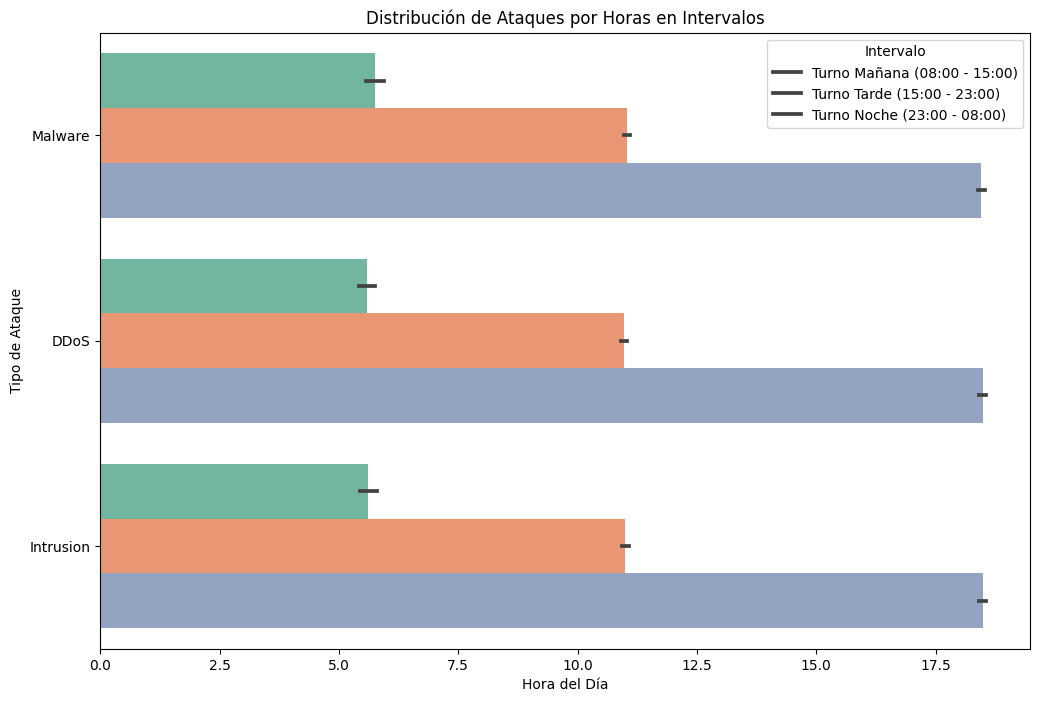

In [16]:
#función para asignar las horas a los intervalos, debido que salen muchoas barras 

def asignar_intervalo(hora):
  
    if 8 <= hora < 15:
        return 'Turno_mañana'
    elif 15 <= hora < 23:
        return 'Turno_tarde'
    else:
        return 'Turno_noche'

# Aplicar la función para crear una nueva columna 'Intervalo' en el DataFrame
df_eda['Intervalo'] = df_eda['Hora_entera'].apply(asignar_intervalo)
# Crear un bar plot para la distribución de ataques por horas en intervalos
plt.figure(figsize=(12, 8))
sns.barplot(x='Hora_entera', y='Tipo_ataque', hue='Intervalo', data=df_eda, palette='Set2')
plt.title('Distribución de Ataques por Horas en Intervalos')
plt.xlabel('Hora del Día')
plt.ylabel('Tipo de Ataque')
plt.legend(title='Intervalo', bbox_to_anchor=(1, 1), labels=['Turno Mañana (08:00 - 15:00)', 'Turno Tarde (15:00 - 23:00)', 'Turno Noche (23:00 - 08:00)'])
plt.show()

In [17]:
#F_absolute tipo ataque
F_absoluta_ataque= df_eda.Tipo_ataque.value_counts()
F_relativa_ataque= df_eda.Tipo_ataque.value_counts(normalize=True)*100

#f_relativa turno de ataques
F_absoluta_intervalo= df_eda.Intervalo.value_counts()
F_relativa_intervalo= df_eda.Intervalo.value_counts(normalize=True)*100

#F_absolute conjuntamente
F_absoluta=df_eda.groupby(['Tipo_ataque', 'Intervalo']).size().reset_index(name='Frecuencia Absoluta')

#f_relativa entre T.ataque y Hora
F_relativa = (df_eda.groupby(['Tipo_ataque', 'Intervalo']).size() / len(df_eda)).reset_index(name='Frecuencia Relativa')

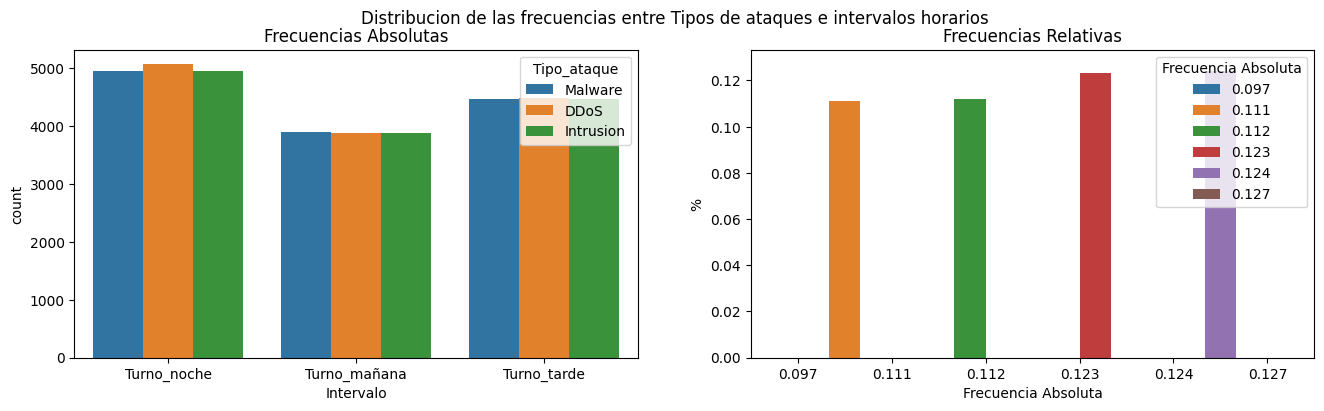

In [18]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(16,4))# creamos la figura que gusrada los arrays en axs
fig.suptitle("Distribucion de las frecuencias entre Tipos de ataques e intervalos horarios");# suptitle le da titulo a toda la figura 
ax= axs.flatten()

sns.countplot(x = "Intervalo", data = df_eda, ax=axs[0], hue ="Tipo_ataque")# FRECUENCIAS ABOSULTAS 
axs[0].set_title("Frecuencias Absolutas");

#PARA LA FRECUENCIA RELATIVA TENEMOS QUE CALCULARLA ANTES NOSOSTROS
# Calcular la frecuencia relativa
ocurrencias = len(df_eda)
F_relativa = round(F_absoluta['Frecuencia Absoluta'] / ocurrencias, 3)
sns.barplot(x = F_relativa, y = F_relativa, hue = F_relativa, ax = axs[1], width=2)
axs[1].set_title("Frecuencias Relativas")
axs[1].set_ylabel("%");

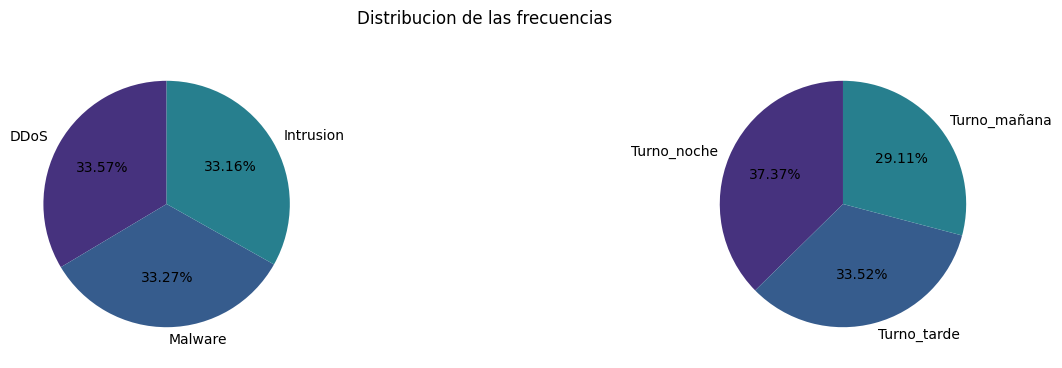

In [19]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(16,4))# creamos la figura que gusrada los arrays en axs
fig.suptitle("Distribucion de las frecuencias");# suptitle le da titulo a toda la figura 
data = F_absoluta_ataque

axs[0].pie(data.values,labels=data.index,autopct='%.2f%%', startangle= 90,colors=sns.color_palette('viridis'));

data = F_absoluta_intervalo

axs[1].pie(data.values,labels=data.index,autopct='%.2f%%', startangle= 90,colors=sns.color_palette('viridis'));

In [20]:

#F_absolute
F_absoluta=df_eda.groupby(['Tipo_ataque', 'Intervalo']).size().reset_index(name='Frecuencia Absoluta')

F_absoluta

,Tipo_ataque,Intervalo,Frecuencia Absoluta
0,DDoS,Turno_mañana,3882
1,DDoS,Turno_noche,5061
2,DDoS,Turno_tarde,4485
3,Intrusion,Turno_mañana,3872
4,Intrusion,Turno_noche,4937
5,Intrusion,Turno_tarde,4456
6,Malware,Turno_mañana,3891
7,Malware,Turno_noche,4951
8,Malware,Turno_tarde,4465


In [21]:
#f_relativa entre T.ataque y Hora
F_relativa = (df_eda.groupby(['Tipo_ataque', 'Intervalo']).size() / len(df_eda)).reset_index(name='Frecuencia Relativa')

F_relativa

,Tipo_ataque,Intervalo,Frecuencia Relativa
0,DDoS,Turno_mañana,0.097050
1,DDoS,Turno_noche,0.126525
2,DDoS,Turno_tarde,0.112125
3,Intrusion,Turno_mañana,0.096800
4,Intrusion,Turno_noche,0.123425
5,Intrusion,Turno_tarde,0.111400
6,Malware,Turno_mañana,0.097275
7,Malware,Turno_noche,0.123775
8,Malware,Turno_tarde,0.111625


In [34]:
df_eda.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado_ciudades_final.xlsx", index= False)

# DISTRIBUCIONES CON LOS RESULTADOS  DE LAS IPS DE LOS MAPAS

In [35]:
df_lugares_origen.head(2)

,Longitud,Latitud,Info_Lugar,Ciudad
0,29.555740,52.658705,"83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...","Мольча, Чыркавіцкі сельскі Савет, Provincia de..."
1,35.554545,45.445429,"República Autónoma de Crimea, Ucrania",Ucrania


In [36]:
df_eda.head(2)

,Anyo,Fecha,Hora,IP Origen,Destino IP,Ciudades,Estados,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Etiqueta_x,Informacion_usuario,Informacion_dispositivo,Indicadores_malware,Puntuaciones_anomalias,Hora_entera,Intervalo,Tipo_etiqueta
0,2023,2023-05-30,2023-12-23 06:33:58,103.216.15.12,84.9.164.252,Jamshedpur,Sikkim,Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,2867,6,Turno_noche,normal
1,2020,2020-08-26,2023-12-23 07:08:30,78.199.217.198,66.191.137.154,Bilaspur,Nagaland,Malware,Low,Aperiam quos modi officiis veritatis rem. Omni...,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C...",1,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,515,7,Turno_noche,anómala


In [37]:
df_lugares_origen.value_counts()

Longitud   Latitud     Info_Lugar                                                                                 Ciudad                                           
26.191019   50.547868  Ільпінь, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania  Ucrania                                              4
26.230171   50.578345  Великоомелянська сільська громада, Рівненський район, Óblast de Rivne, 35360, Ucrania      Великоомелянська, Ucrania                            4
26.226738   50.577680  Великоомелянська сільська громада, Рівненський район, Óblast de Rivne, 35360, Ucrania      Великоомелянська, Ucrania                            3
26.190156   50.545351  Ільпінь, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania  Ucrania                                              3
27.351672   53.153794  Бор, Грозаўскі сельскі Савет, Капыльскі раён, Provincia de Minsk, Belarús                  Грозаўскі, Капыльскі, Provincia de Minsk, Bela

In [38]:
df_lugares_origen.value_counts(normalize=True)*100

Longitud   Latitud     Info_Lugar                                                                                 Ciudad                                           
26.191019   50.547868  Ільпінь, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania  Ucrania                                              0.835073
26.230171   50.578345  Великоомелянська сільська громада, Рівненський район, Óblast de Rivne, 35360, Ucrania      Великоомелянська, Ucrania                            0.835073
26.226738   50.577680  Великоомелянська сільська громада, Рівненський район, Óblast de Rivne, 35360, Ucrania      Великоомелянська, Ucrania                            0.626305
26.190156   50.545351  Ільпінь, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania  Ucrania                                              0.626305
27.351672   53.153794  Бор, Грозаўскі сельскі Савет, Капыльскі раён, Provincia de Minsk, Belarús                  Грозаўскі, Капыльс

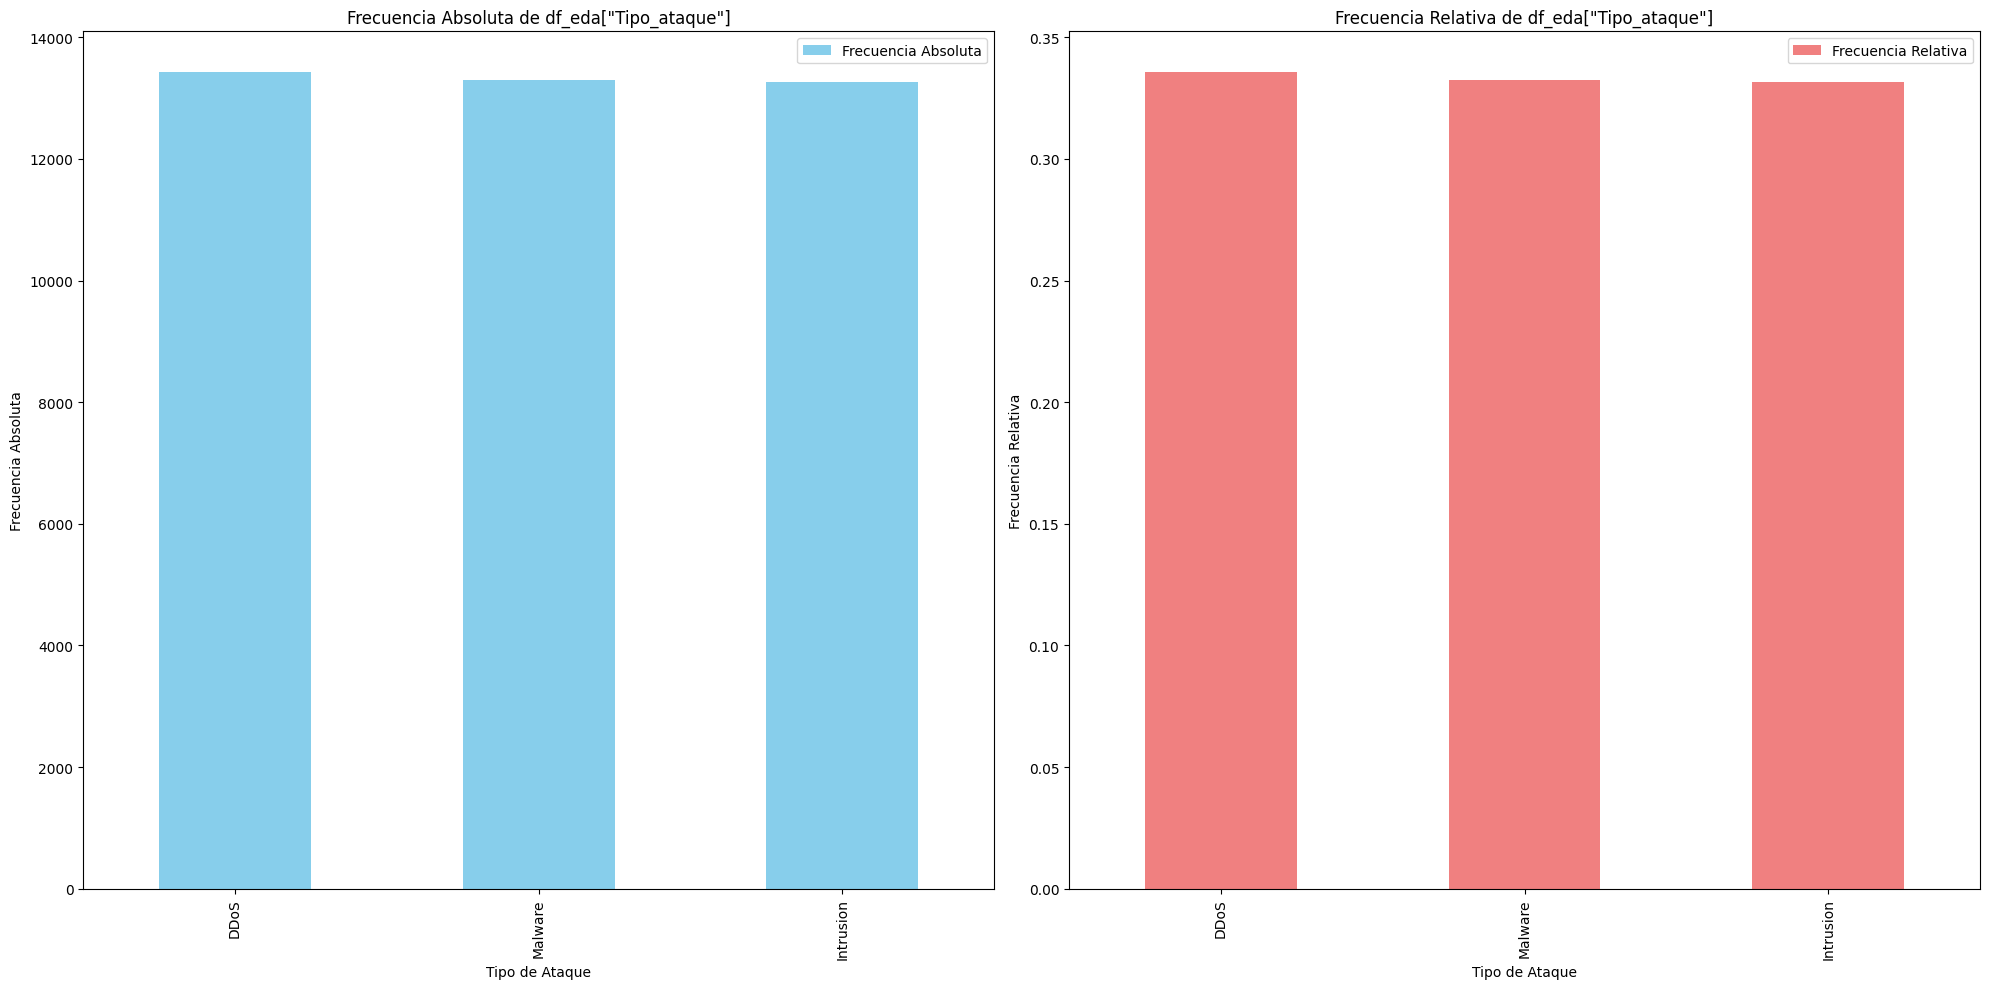

In [44]:
# Configuración de la figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Gráfico 3: Frecuencia Absoluta de df_eda['Tipo_ataque']
ax3 = axes[0];
df_eda['Tipo_ataque'].value_counts().plot(kind='bar', ax=ax3, color='skyblue')
ax3.set_title('Frecuencia Absoluta de df_eda["Tipo_ataque"]')
ax3.set_xlabel('Tipo de Ataque')
ax3.set_ylabel('Frecuencia Absoluta')
ax3.legend(['Frecuencia Absoluta'])

# Gráfico 4: Frecuencia Relativa de df_eda['Tipo_ataque']
ax4 = axes[1]
df_eda['Tipo_ataque'].value_counts(normalize=True).plot(kind='bar', ax=ax4, color='lightcoral')
ax4.set_title('Frecuencia Relativa de df_eda["Tipo_ataque"]')
ax4.set_xlabel('Tipo de Ataque')
ax4.set_ylabel('Frecuencia Relativa');
ax4.legend(['Frecuencia Relativa']) 

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show();


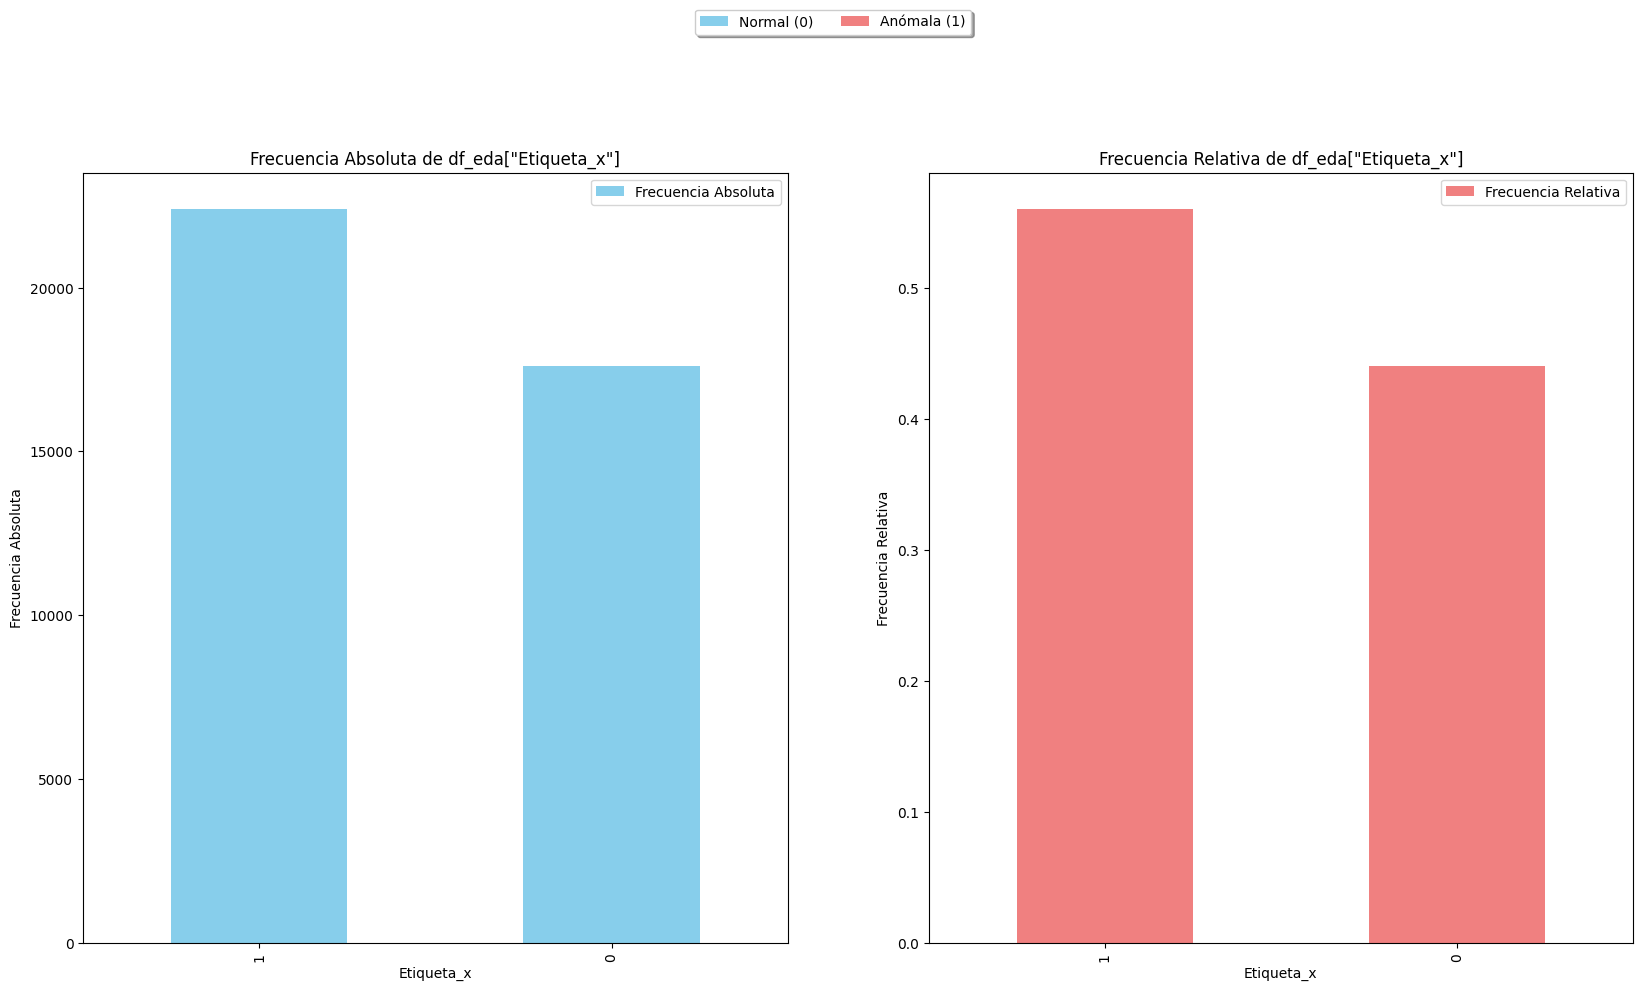

In [51]:
# Configuración de la figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Gráfico 5: Frecuencia Absoluta de df_eda['Etiqueta_x']
ax5 = axes[0];
df_eda['Etiqueta_x'].value_counts().plot(kind='bar', ax=ax5, color='skyblue')
ax5.set_title('Frecuencia Absoluta de df_eda["Etiqueta_x"]')
ax5.set_xlabel('Etiqueta_x')
ax5.set_ylabel('Frecuencia Absoluta')
ax5.legend(['Frecuencia Absoluta'])

# Gráfico 6: Frecuencia Relativa de df_eda['Etiqueta_x']
ax6 = axes[1];
df_eda['Etiqueta_x'].value_counts(normalize=True).plot(kind='bar', ax=ax6, color='lightcoral')
ax6.set_title('Frecuencia Relativa de df_eda["Etiqueta_x"]')
ax6.set_xlabel('Etiqueta_x')
ax6.set_ylabel('Frecuencia Relativa')
ax6.legend(['Frecuencia Relativa'])

# Leyenda explicativa general
fig.legend(['Normal (0)', 'Anómala (1)'], loc='upper center', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True, ncol=2)


C:\Users\victo\AppData\Local\Temp\ipykernel_7536\129763104.py:18: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  plt.tight_layout()
C:\Users\victo\AppData\Local\Temp\ipykernel_7536\129763104.py:18: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.tight_layout()
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


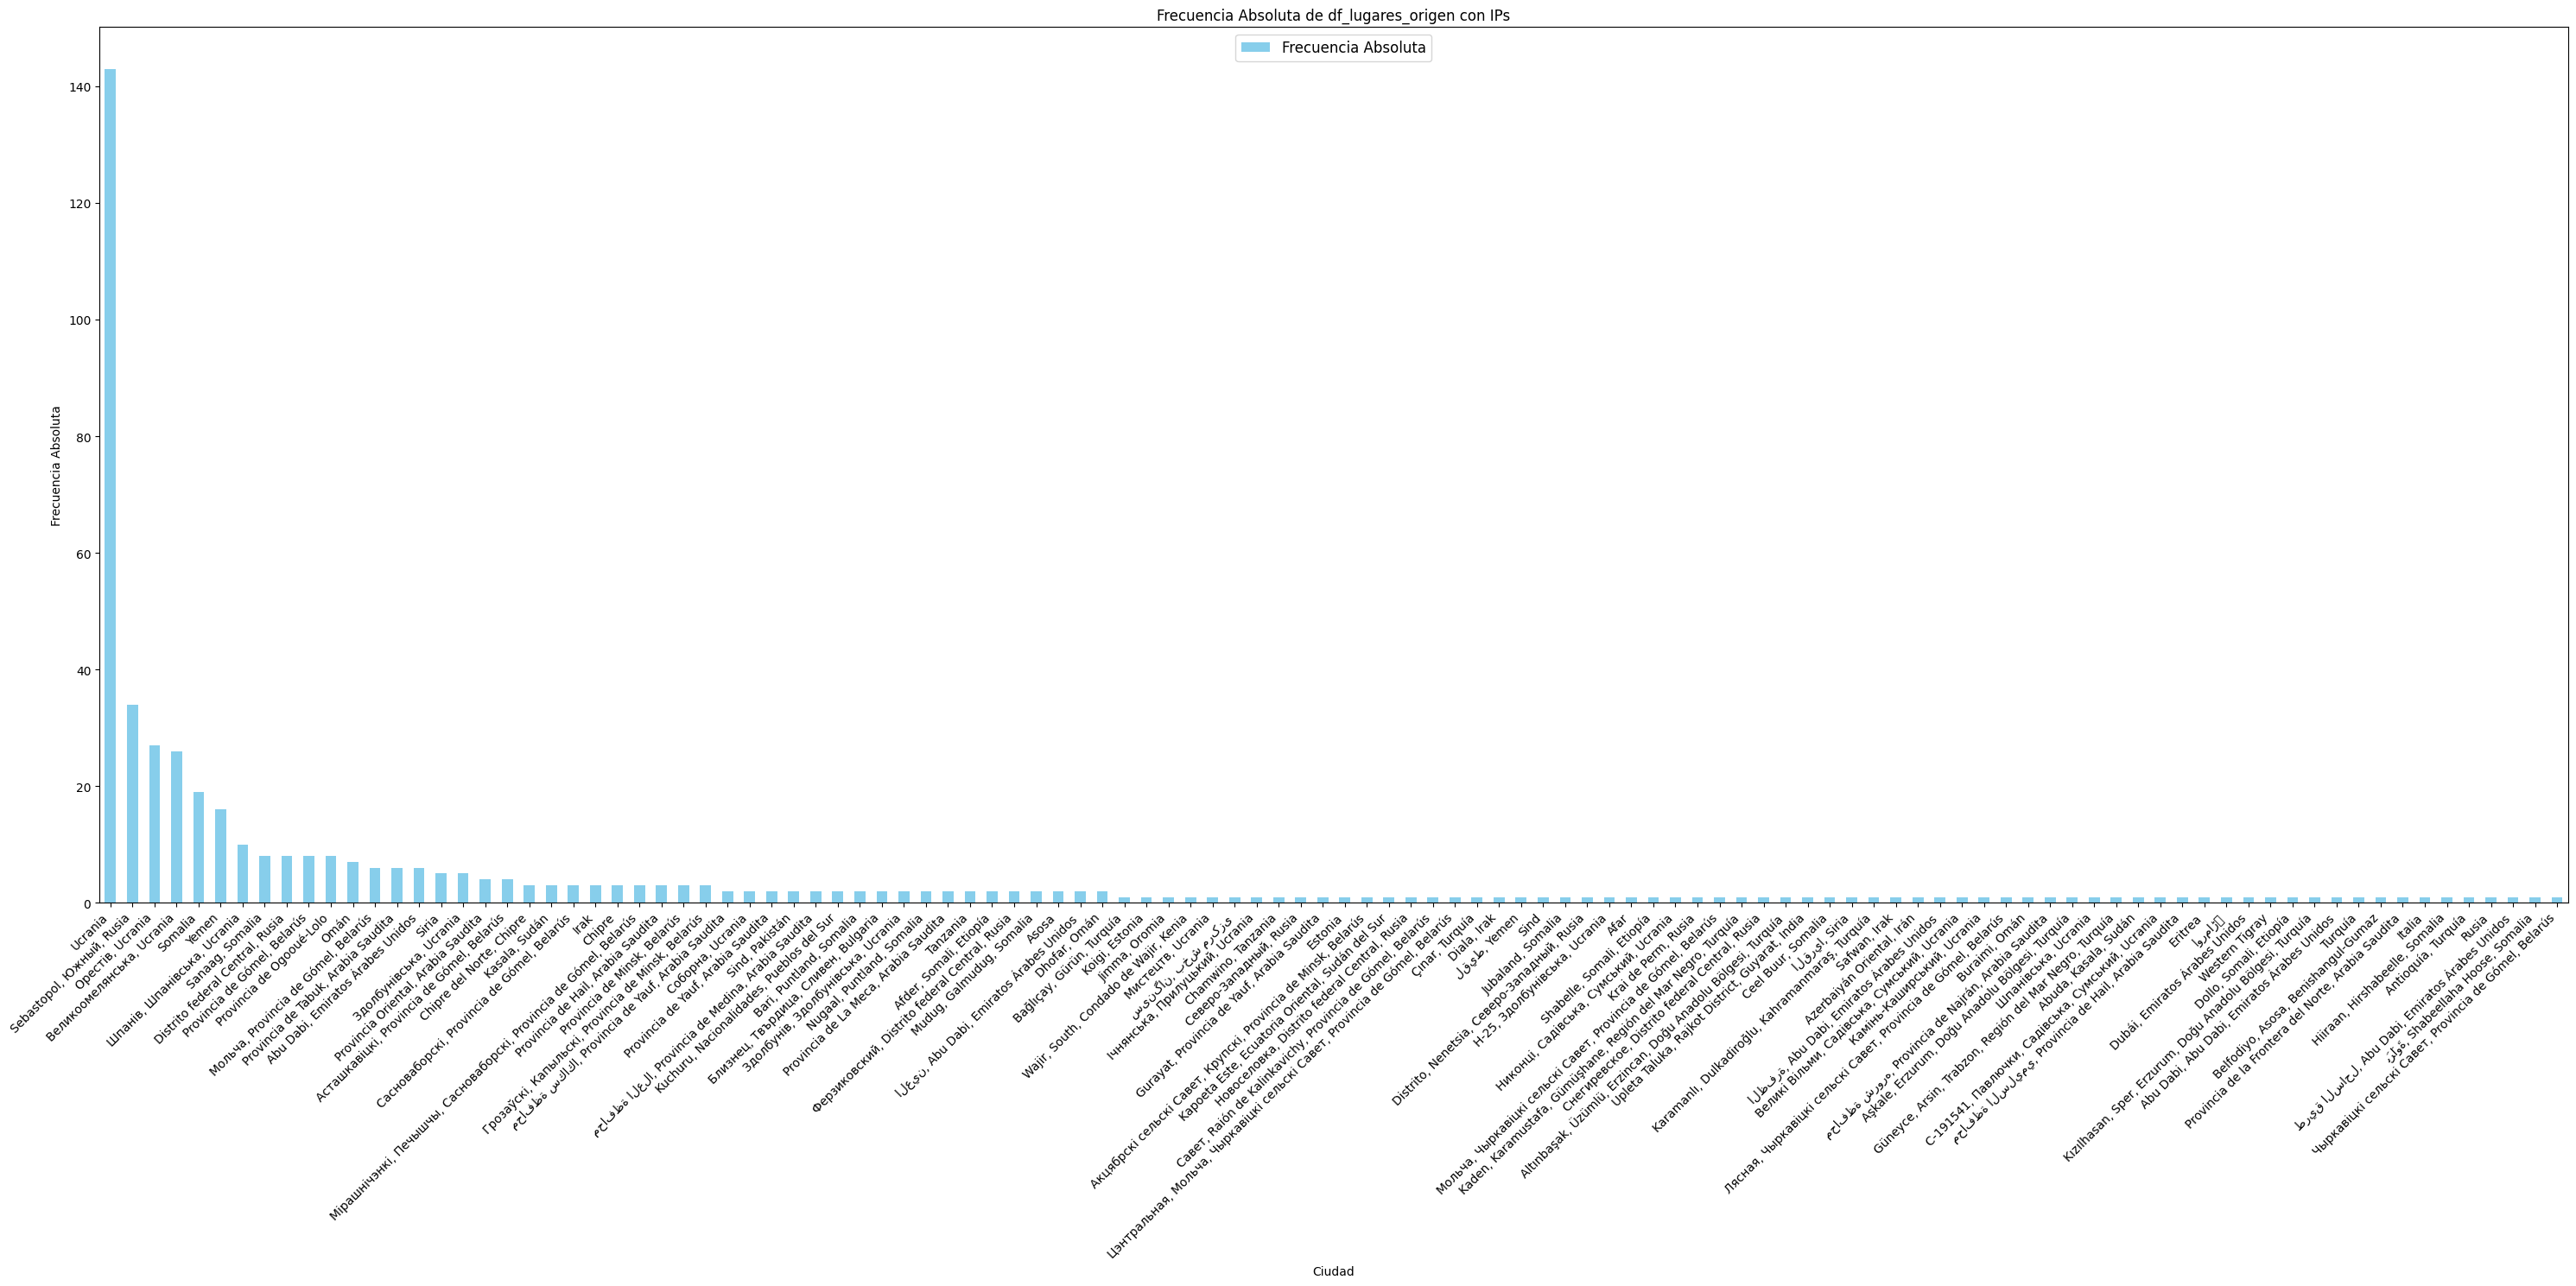

In [53]:
# Configuración de la figura para el Gráfico 1
fig1, ax1 = plt.subplots(figsize=(30, 15))

# Gráfico 1: Frecuencia Absoluta de df_lugares_origen
df_lugares_origen['Ciudad'].value_counts().plot(kind='bar', ax=ax1, color='skyblue');
ax1.set_title('Frecuencia Absoluta de df_lugares_origen con IPs')
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Frecuencia Absoluta');

# Inclinar etiquetas del eje x hacia la derecha
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right');

# Leyenda explicativa
legend_labels = ['Frecuencia Absoluta']
ax1.legend(legend_labels, loc='upper center', fontsize='large')

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show()



C:\Users\victo\AppData\Local\Temp\ipykernel_7536\4007587431.py:18: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  plt.tight_layout()
C:\Users\victo\AppData\Local\Temp\ipykernel_7536\4007587431.py:18: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.tight_layout()
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


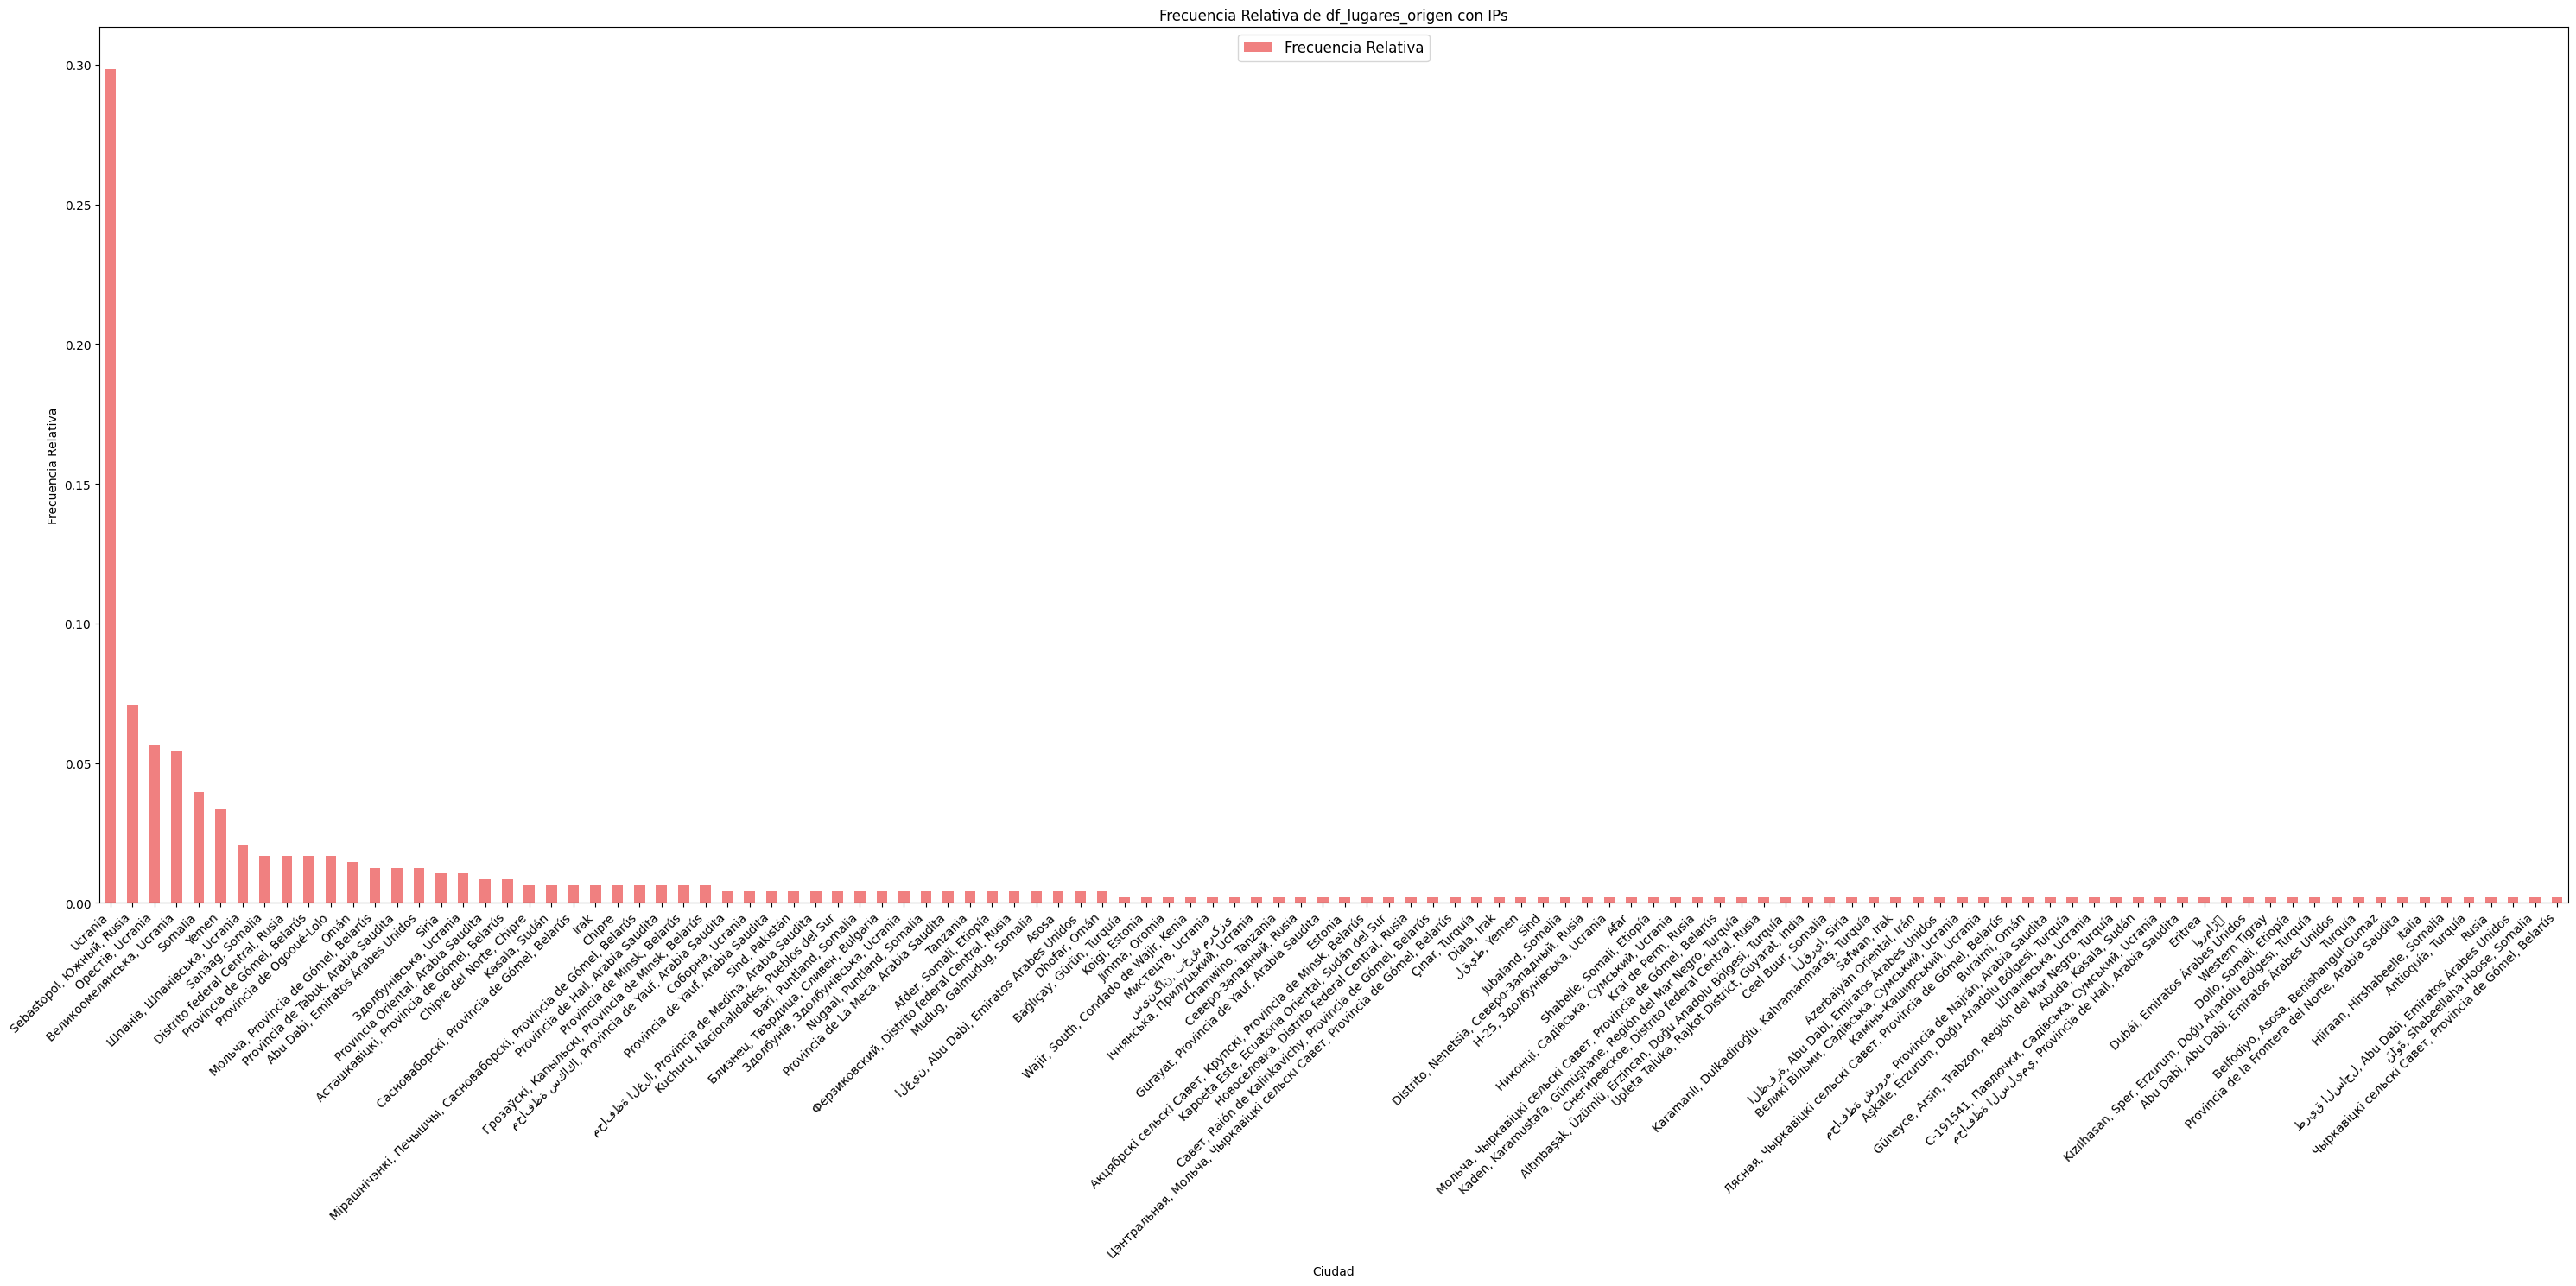

In [54]:
# Configuración de la figura para el Gráfico 2
fig2, ax2 = plt.subplots(figsize=(30, 15))

# Gráfico 2: Frecuencia Relativa de df_lugares_origen
df_lugares_origen['Ciudad'].value_counts(normalize=True).plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Frecuencia Relativa de df_lugares_origen con IPs')
ax2.set_xlabel('Ciudad')
ax2.set_ylabel('Frecuencia Relativa')

# Inclinar etiquetas del eje x hacia la derecha
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Leyenda explicativa
legend_labels = ['Frecuencia Relativa']
ax2.legend(legend_labels, loc='upper center', fontsize='large')

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show()

In [29]:
df_eda.Etiqueta_x.value_counts()

Etiqueta_x
anómala    22392
normal     17608
Name: count, dtype: int64

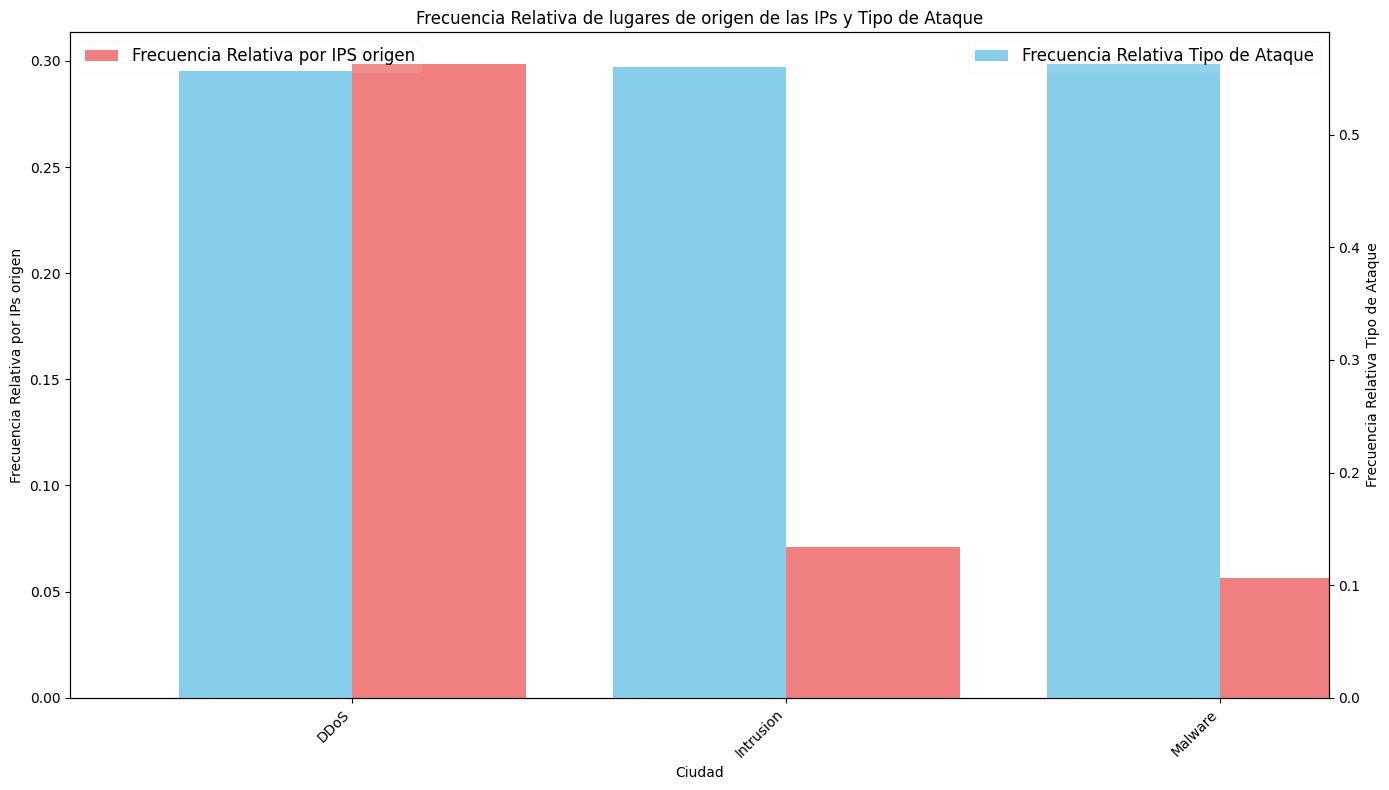

In [68]:
# Configuración de la figura para el Gráfico combinado tipo ataque y lugares:origen por Ips
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico 1: Frecuencia Relativa de df_lugares_origen
df_lugares_origen['Ciudad'].value_counts(normalize=True).plot(kind='bar', ax=ax1, color='lightcoral', position=0, width=0.4)
ax1.set_title('Frecuencia Relativa de lugares de origen de las IPs y Tipo de Ataque')
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Frecuencia Relativa por IPs origen')

# Inclinar etiquetas del eje x hacia la derecha
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

#Leyenda explicativa para el Gráfico 1
legend_labels_1 = ['Frecuencia Relativa por IPS origen']
ax1.legend(legend_labels_1, loc='upper left', fontsize='large',  framealpha=0.1)

# Gráfico 2: Frecuencia Relativa de Tipo de Ataque del df_eda
ax2 = ax1.twinx()
df_eda.groupby('Tipo_ataque')['Etiqueta_x'].mean().plot(kind='bar', ax=ax2, color='skyblue', position=1, width=0.4)
ax2.set_ylabel('Frecuencia Relativa Tipo de Ataque')

# Leyenda explicativa para el Gráfico 2
legend_labels_2 = ['Frecuencia Relativa Tipo de Ataque']
ax2.legend(legend_labels_2, loc='upper right', fontsize='large',  framealpha=0.1)

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show()

### CONVERTIMOS LA ETIQUETA_X EN BINARIA NUMERIA, ASIGNADOLE 1 Y 0 , CREANDO OTRA COLUMNA CON LOS TIPOS DONDE PODREMOS ANOMALA O NORMAL

In [31]:
# Reemplazar 'anómala' con 1 y 'normal' con 0 en la columna 'Etiqueta_x'
df_eda['Etiqueta_x'] = df_eda['Etiqueta_x'].replace({'normal': 0, 'anómala': 1})

# Crear la nueva columna 'Tipo_etiqueta'
df_eda['Tipo_etiqueta'] = df_eda['Etiqueta_x'].map({1: 'anómala', 0: 'normal'})

df_eda.head(2)

,Anyo,Fecha,Hora,IP Origen,Destino IP,Ciudades,Estados,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Etiqueta_x,Informacion_usuario,Informacion_dispositivo,Indicadores_malware,Puntuaciones_anomalias,Hora_entera,Intervalo,Tipo_etiqueta
0,2023,2023-05-30,2023-12-23 06:33:58,103.216.15.12,84.9.164.252,Jamshedpur,Sikkim,Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,2867,6,Turno_noche,normal
1,2020,2020-08-26,2023-12-23 07:08:30,78.199.217.198,66.191.137.154,Bilaspur,Nagaland,Malware,Low,Aperiam quos modi officiis veritatis rem. Omni...,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C...",1,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,515,7,Turno_noche,anómala


In [32]:
df_eda.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado_ciudades_final.xlsx", index= False)

# PINTAMOS EL MAPA CON FOLIUM

In [3]:
df_lugares_origen= pd.read_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen_final.xlsx')

In [4]:
df_lugares_origen

,Longitud,Latitud,Info_Lugar,Ciudad
0,29.555740,52.658705,"83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...","Мольча, Чыркавіцкі сельскі Савет, Provincia de..."
1,35.554545,45.445429,"República Autónoma de Crimea, Ucrania",Ucrania
2,26.230098,50.573701,"Великоомелянська сільська громада, Рівненський...","Великоомелянська, Ucrania"
3,26.190156,50.545351,"Ільпінь, Здолбунівська міська громада, Рівненс...",Ucrania
4,53.100078,17.903919,"Dhofar, Omán","Dhofar, Omán"
...,...,...,...,...
492,35.701059,51.487527,"2-я Косторная, Любимовский сельсовет, Большесо...","Distrito federal Central, Rusia"
493,45.422774,9.140946,"Cali Saahid, Burco برعو, Togdheer, Somalia",Somalia
494,35.575340,45.456724,"República Autónoma de Crimea, Ucrania",Ucrania
495,33.303067,44.370377,"Sebastopol, Южный федеральный округ, Rusia","Sebastopol, Южный, Rusia"



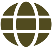
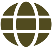
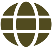
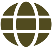
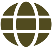
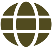
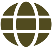
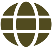
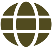
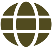
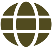
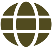
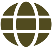
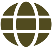
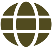
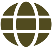
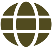
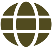
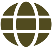
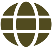
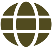
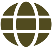
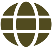
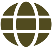
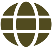
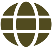
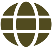
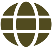
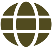
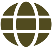
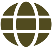
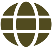
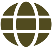
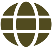
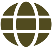
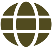
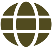
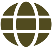
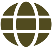
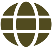
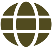
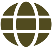
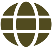
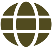
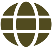
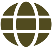
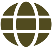
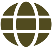
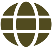
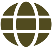
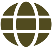
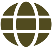
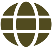
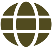
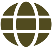
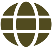
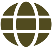
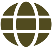
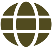
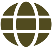
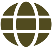
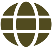
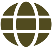
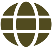
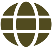
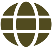
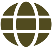
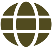
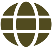
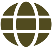
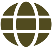
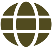
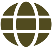
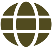
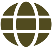
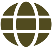
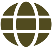
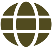
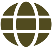
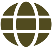
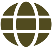
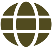
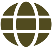
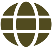
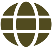
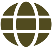
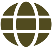
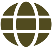
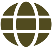
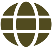
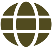
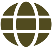
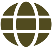
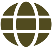
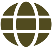
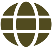
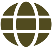
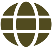
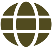
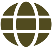
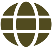
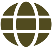
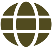
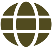
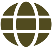
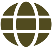
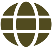
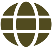
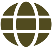
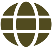
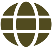
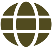
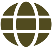
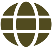
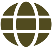
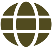
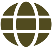
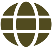
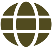
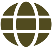
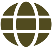
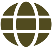
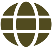
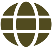
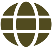
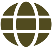
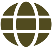
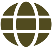
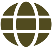
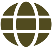
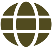
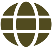
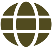
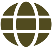
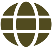
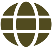
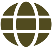
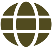
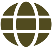
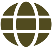
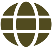
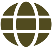
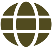
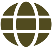
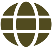
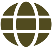
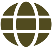
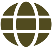
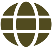
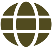
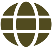
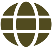
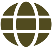
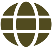
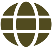
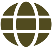
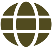
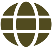
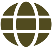
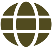
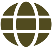
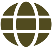
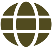
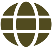
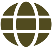
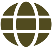
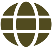
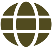
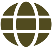
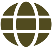
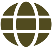
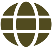
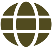
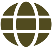
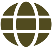
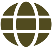
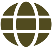
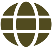
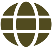
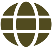
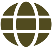
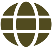
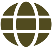
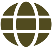
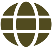
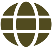
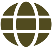
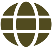
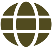
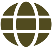
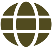
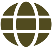
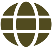
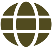
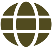
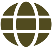
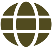
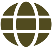
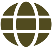
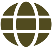
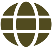
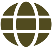
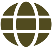
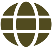
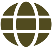
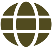
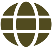
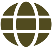
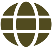
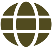
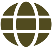
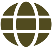
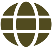
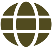
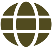
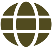
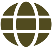
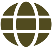
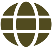
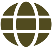
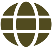
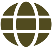
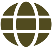
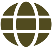
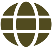
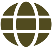
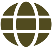
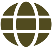
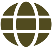
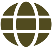
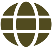
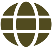
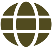
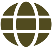
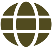
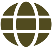
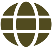
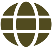
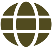
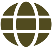
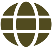
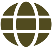
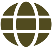
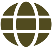
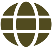
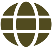
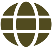
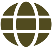
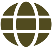
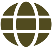
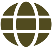
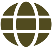
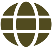
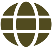
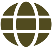
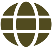
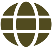
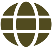
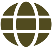
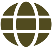
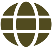
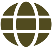
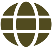
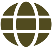
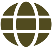
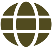
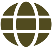
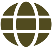
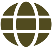
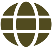
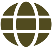
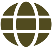
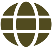
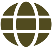
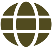
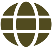
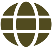
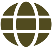
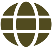
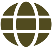
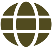
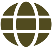
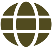
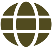
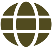
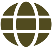
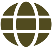
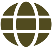
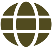
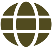
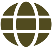
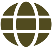
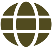
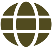
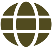
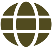
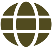
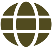
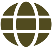
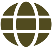
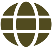
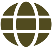
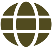
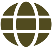
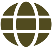
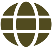
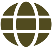
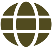
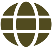
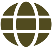
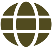
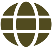
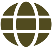
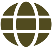
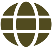
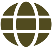
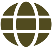
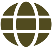
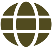
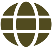
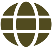
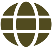
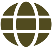
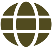
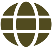
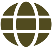
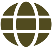
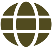
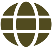
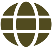
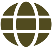
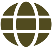
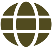
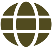
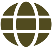
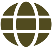
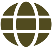
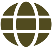
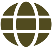
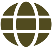
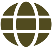
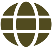
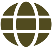
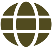
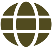
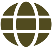
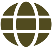
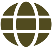
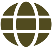
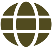
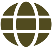
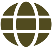
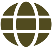
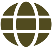
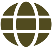
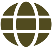
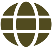
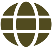
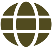
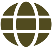
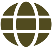
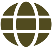
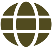
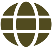
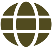
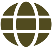
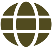
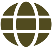
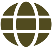
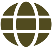
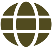
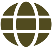
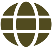
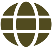
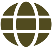
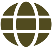
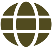
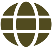
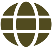
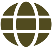
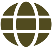
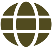
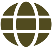
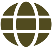
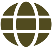
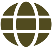
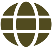
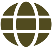
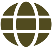
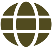
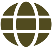
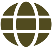
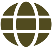
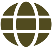
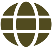
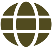
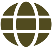
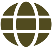
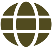
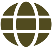
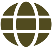
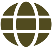
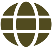
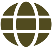
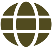
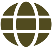
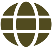
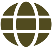
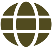
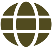
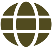
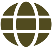
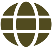
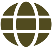
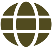
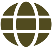
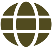
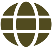
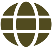
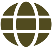
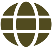
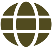
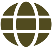
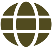
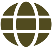
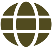
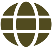
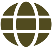
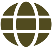
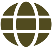
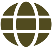
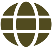
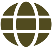
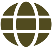
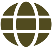
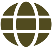
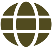
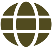
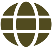
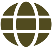
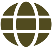
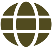
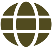
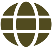
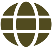
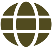
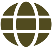
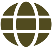
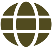
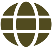
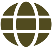
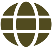
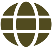
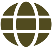
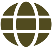
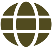
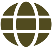
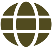
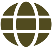
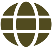
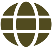
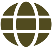
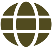
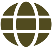
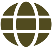
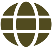
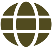
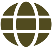
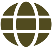
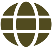
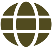
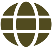
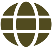
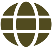
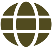
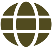
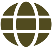
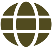
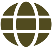
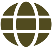
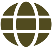
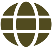
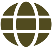
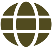
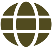
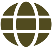
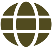
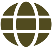
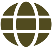
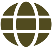
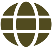
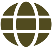
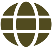
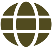
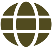
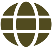
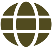

In [70]:
#MAPA SIN ZONAS DE CALOR IPS ORIGEN, LAS QUE SON REALMENTE VALODAD TRAS FILTRADO DE ZONAS AGUA Y ZONAS NO LOCALIZABLES

# Filtrar el DataFrame para quedarse solo con las filas que tienen información de geolocalización
df_lugares_filtrado = df_lugares_origen[['Longitud', 'Latitud', 'Info_Lugar', 'Ciudad']].dropna(subset=['Longitud', 'Latitud'])

# Convertir las columnas de longitud y latitud a una lista de ubicaciones
lista_origen = df_lugares_filtrado[['Longitud', 'Latitud', 'Info_Lugar']].values.tolist()

# Convertir cualquier valor no numérico en las columnas de longitud y latitud a NaN
for i, tupla in enumerate(lista_origen):
    for j, valor in enumerate(tupla[:2]):
        if not isinstance(valor, (int, float)):
            lista_origen[i][j] = np.nan

# Eliminar las filas que aún contienen valores no numéricos
lista_origen = [tupla for tupla in lista_origen if not any(np.isnan(tupla[:2]))]


# Crear un objeto de mapa centrado en la primera ubicación
mapa = folium.Map(location=lista_origen[0][:2], zoom_start=10)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al grupo con iconos personalizados
for tupla in lista_origen:
    # Cargar el ícono personalizado
    icono_personalizado = folium.CustomIcon(icon_image=r'C:\Users\victo\Pictures\internet_icon.png', icon_size=(30, 30))
    
    # Agregar el marcador con el icono personalizado
    folium.Marker(location=tupla[:2], popup=tupla[2], icon=icono_personalizado).add_to(marker_cluster)


# Guardar el mapa como un archivo HTML
mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\mapa_geolocalizado_ips_origen_final.html')

# Mostrar el mapa en la notebook
display(mapa)



In [75]:
# MAPA IPS ORIGEN CO ZAONA DE CALOR


# Filtrar el DataFrame para quedarse solo con las filas que tienen información de geolocalización
df_lugares_filtrado = df_lugares_origen[['Longitud', 'Latitud', 'Info_Lugar', 'Ciudad']].dropna(subset=['Longitud', 'Latitud'])

# Convertir las columnas de longitud y latitud a una lista de ubicaciones
lista_origen = df_lugares_filtrado[['Latitud', 'Longitud']].values.tolist()

# Crear un objeto de mapa centrado en la primera ubicación
mapa = folium.Map(location=lista_origen[0][::-1], zoom_start=10)# Nota: Se invierte el orden para folium (lat, lon)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)


# Agregar un mapa de calor
HeatMap(lista_origen).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\mapa_geolocalizado_ips_origen_final_con calor.html')

# Mostrar el mapa en la notebook
display(mapa)

